In [10]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [5]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])


In [6]:
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)


Epoch 1/50


448/448 [==============================] - 501s 1s/step - loss: 1.8081 - accuracy: 0.2557 - val_loss: 1.7334 - val_accuracy: 0.3131
Epoch 2/50
448/448 [==============================] - 160s 357ms/step - loss: 1.6328 - accuracy: 0.3618 - val_loss: 1.5245 - val_accuracy: 0.4184
Epoch 3/50
448/448 [==============================] - 183s 408ms/step - loss: 1.5089 - accuracy: 0.4222 - val_loss: 1.4266 - val_accuracy: 0.4569
Epoch 4/50
448/448 [==============================] - 176s 393ms/step - loss: 1.4276 - accuracy: 0.4522 - val_loss: 1.3607 - val_accuracy: 0.4840
Epoch 5/50
448/448 [==============================] - 257s 573ms/step - loss: 1.3704 - accuracy: 0.4780 - val_loss: 1.3230 - val_accuracy: 0.4982
Epoch 6/50
448/448 [==============================] - 210s 469ms/step - loss: 1.3193 - accuracy: 0.4994 - val_loss: 1.2781 - val_accuracy: 0.5181
Epoch 7/50
448/448 [==============================] - 101s 227ms/step - loss: 1.2789 - accuracy: 0.5158 - val_loss: 1.2544 - 

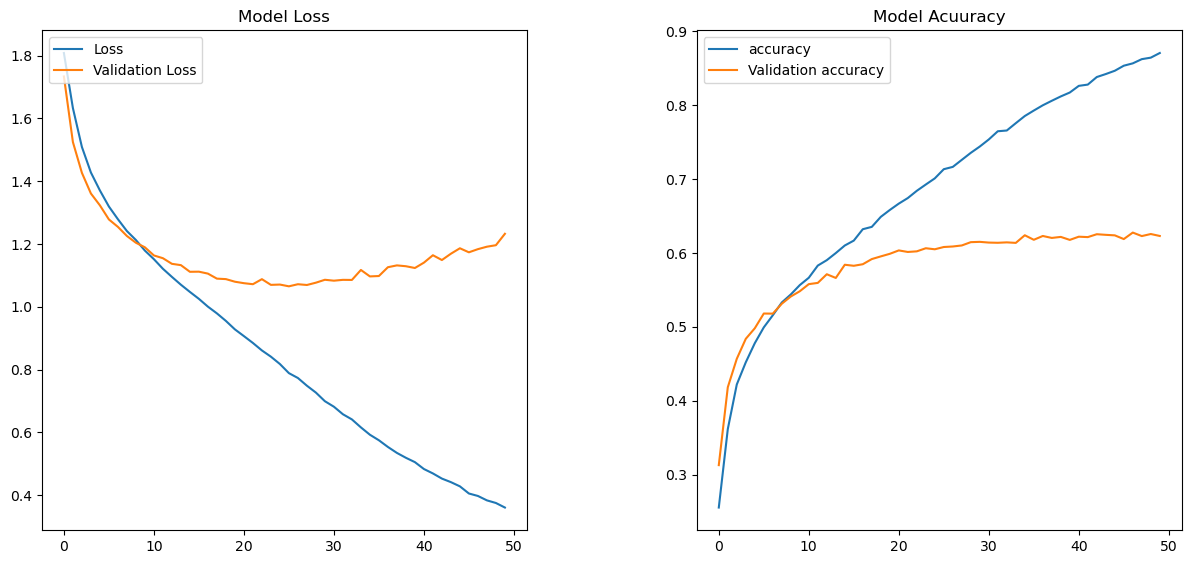

In [18]:
#plotting Loss and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Loss','Validation Loss'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

#plotting accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Acuuracy')
plt.legend(['accuracy','Validation accuracy'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [19]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)


In [20]:
# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

In [21]:
from zipfile import ZipFile
file_name = ['RAVDESS', 'SAVEE', 'CREMA']

In [22]:
for f in file_name:
  with ZipFile(r'C:\Users\User\Desktop\Internships\Nullclass\noice\RAVDESS.zip') as zip:
    zip.extractall()
  with ZipFile(r'C:\Users\User\Desktop\Internships\Nullclass\noice\SAVEE.zip') as zip:
    zip.extractall()
  with ZipFile(r'C:\Users\User\Desktop\Internships\Nullclass\noice\CREMA.zip') as zip:
    zip.extractall()
    print("Done")

Done
Done
Done


In [23]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import Audio

In [24]:
df = pd.read_csv('data_path.csv')
df

,Emotions,Path
0,angry,data/RAVDESS/Actor_08/03-01-05-02-02-01-08.wav
1,angry,data/RAVDESS/Actor_08/03-01-05-02-01-02-08.wav
2,calm,data/RAVDESS/Actor_08/03-01-02-02-02-02-08.wav
3,disgust,data/RAVDESS/Actor_08/03-01-07-01-01-01-08.wav
4,surprise,data/RAVDESS/Actor_08/03-01-08-01-02-01-08.wav
...,...,...
9357,angry,ALL/KL_a12.wav
9358,neutral,ALL/KL_n18.wav
9359,surprise,ALL/JE_su04.wav
9360,surprise,ALL/DC_su06.wav


22050


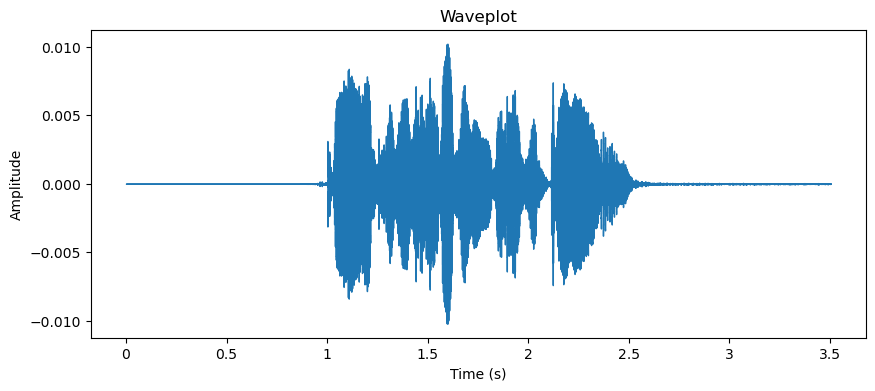

In [25]:
def display_waveplot(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)
    print(sr)
    # Plot waveplot
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveplot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    ipd.display(Audio(y, rate=sr))

# Example usage
audio_path = df.iloc[1000, 1]
display_waveplot(audio_path)
     

In [26]:
def get_mel_spectrogram(wave, sample_rate):
  # Compute Mel spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(y=wave, sr = sample_rate, n_fft = 2048, hop_length = 512, n_mels = 90)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  return log_mel_spectrogram

In [27]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [28]:
def extract_mel_spectrogram(audio_path, trim_duration=3, show_plot=False):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, duration=trim_duration, offset=0.5)

        # Trim audio to 3 seconds
        if len(y) < sr * trim_duration:
            y = np.pad(y, (0, sr * trim_duration - len(y)))

        y = noise(y)

        # Extract mel spectrogram
        mel_spectrogram = get_mel_spectrogram(y, sr)

        # Display spectrogram
        if show_plot:
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_spectrogram, y_axis='mel', x_axis='time')
            plt.title('Mel Spectrogram')
            plt.colorbar(format='%+2.0f dB')
            plt.show()

        return mel_spectrogram

    except Exception as e:
        print(f"Error processing audio: {e}")
        return None



In [29]:
%%time
original_data = df['Path'].apply(extract_mel_spectrogram)

CPU times: total: 6min 13s
Wall time: 3min 46s


In [30]:
original_data

0       [[-25.424022030421625, -22.553660858951332, -2...
1       [[-8.812499911770146, -9.37329875898323, -13.6...
2       [[-46.38126197810266, -44.760967128216265, -45...
3       [[-43.790625824038784, -36.668973243079776, -3...
4       [[-35.41344407710558, -32.59624615947213, -36....
                              ...                        
9357    [[-23.765203825078984, -22.903856257482683, -2...
9358    [[-19.738182259464164, -22.73401239468877, -24...
9359    [[-2.2391262336046682, -2.372804090090847, -3....
9360    [[6.0824656866897175, 5.627036388806609, 4.757...
9361    [[8.465742435206892, 8.40774563139136, 7.26158...
Name: Path, Length: 9362, dtype: object

In [31]:
np.stack(original_data, axis=0).shape

(9362, 90, 130)

In [32]:
%%time
noisy_data = df['Path'].apply(extract_mel_spectrogram)

CPU times: total: 6min 47s
Wall time: 4min 11s


In [33]:
noisy_data

0       [[-19.95143479800084, -18.623490447582956, -23...
1       [[-15.797438553274834, -11.197101265350218, -1...
2       [[-46.560191446236146, -45.881603919397165, -4...
3       [[-42.93421930617868, -38.10119209007801, -37....
4       [[-39.632513834065925, -33.40584621662174, -30...
                              ...                        
9357    [[-24.447159651195854, -22.475730924465527, -2...
9358    [[-20.101136242053826, -22.740550581763685, -2...
9359    [[-1.6106312062058517, -1.920355008790956, -2....
9360    [[6.480991411575374, 6.1650881451912465, 5.126...
9361    [[8.350552349255302, 8.546202749572453, 7.1084...
Name: Path, Length: 9362, dtype: object

In [34]:
np.stack(noisy_data, axis=0).shape

(9362, 90, 130)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, BatchNormalization, Dropout, TimeDistributed

In [36]:
# Encode emotion labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df['Emotions'])
Y[:5], Y.shape

(array([0, 0, 1, 2, 7]), (9362,))

In [37]:
label_encoder.classes_


array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype=object)

In [38]:
Y = np.concatenate((Y, Y))
Y.shape

(18724,)

In [39]:
data = np.concatenate((np.stack(original_data, axis=0), np.stack(noisy_data, axis=0)))
data.shape

(18724, 90, 130)

In [40]:
import joblib

In [41]:
# Save the array to a file
joblib.dump(data, 'X.joblib')
joblib.dump(Y, 'Y.joblib')

['Y.joblib']

In [42]:
data = joblib.load('X.joblib')
Y = joblib.load('Y.joblib')

In [43]:
data.shape

(18724, 90, 130)

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, shuffle=True)

In [45]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train.shape

(14979, 90, 130, 1)

In [46]:
# Build the CNN-LSTM model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Flatten layer
model.add(TimeDistributed(Flatten()))

# Reshape for LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))

# Dense (fully connected) layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 88, 128, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 44, 64, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 44, 64, 32)        128       
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 44, 64, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 21, 31, 64)       

In [48]:
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 40:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [49]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(os.path.join('audio_model_new.h5'), monitor='loss', save_best_only=True)

In [50]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [51]:
# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [52]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=16, callbacks=[checkpoint_callback, callback])

Epoch 1/60
937/937 [==============================] - ETA: 0s - loss: 1.7005 - accuracy: 0.3193

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


937/937 [==============================] - 337s 348ms/step - loss: 1.7005 - accuracy: 0.3193 - val_loss: 1.5911 - val_accuracy: 0.3658 - lr: 0.0010
Epoch 2/60
937/937 [==============================] - 318s 340ms/step - loss: 1.5703 - accuracy: 0.3746 - val_loss: 1.4891 - val_accuracy: 0.4166 - lr: 0.0010
Epoch 3/60
937/937 [==============================] - 345s 368ms/step - loss: 1.5018 - accuracy: 0.4072 - val_loss: 1.4670 - val_accuracy: 0.4219 - lr: 0.0010
Epoch 4/60
937/937 [==============================] - 314s 335ms/step - loss: 1.4550 - accuracy: 0.4334 - val_loss: 1.3673 - val_accuracy: 0.4684 - lr: 0.0010
Epoch 5/60
937/937 [==============================] - 280s 299ms/step - loss: 1.4030 - accuracy: 0.4560 - val_loss: 1.3395 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 6/60
937/937 [==============================] - 460s 491ms/step - loss: 1.3409 - accuracy: 0.4866 - val_loss: 1.2935 - val_accuracy: 0.4929 - lr: 0.0010
Epoch 7/60
937/937 [==============================] - 246

937/937 [==============================] - 273s 291ms/step - loss: 0.0885 - accuracy: 0.9730 - val_loss: 1.0118 - val_accuracy: 0.8358 - lr: 3.0119e-04
Epoch 53/60
937/937 [==============================] - 265s 283ms/step - loss: 0.0771 - accuracy: 0.9755 - val_loss: 1.0351 - val_accuracy: 0.8406 - lr: 2.7253e-04
Epoch 54/60
937/937 [==============================] - 295s 315ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 1.0121 - val_accuracy: 0.8427 - lr: 2.4660e-04
Epoch 55/60
937/937 [==============================] - 322s 343ms/step - loss: 0.0665 - accuracy: 0.9802 - val_loss: 1.0353 - val_accuracy: 0.8441 - lr: 2.2313e-04
Epoch 56/60
937/937 [==============================] - 325s 347ms/step - loss: 0.0623 - accuracy: 0.9802 - val_loss: 1.0374 - val_accuracy: 0.8459 - lr: 2.0190e-04
Epoch 57/60
937/937 [==============================] - 312s 333ms/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 1.0771 - val_accuracy: 0.8494 - lr: 1.8268e-04
Epoch 58/60
937/937 [=======

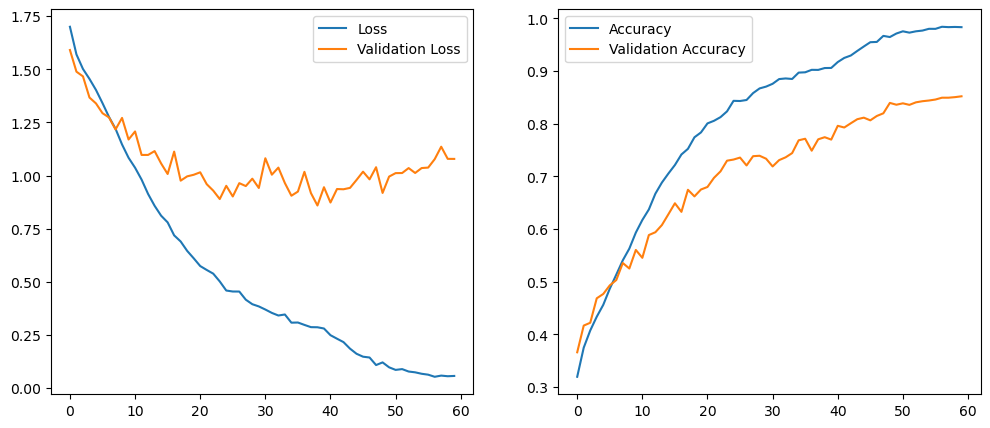

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [55]:
model.save('audio_model.h5')
model1 = tf.keras.models.load_model('audio_model.h5')


In [56]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model1.predict(np.expand_dims(data, axis=-1))

586/586 [==============================] - 53s 86ms/step


In [57]:
confusion_matrix(Y, np.argmax(y_pred, axis=1))

array([[2976,    0,   17,   11,   37,    2,    2,    1],
       [   0,  374,    0,    0,    0,    3,    7,    0],
       [  16,    3, 2936,   23,   14,   16,   36,    2],
       [  15,    1,   14, 2943,   27,    8,   32,    6],
       [  37,    0,   19,   36, 2933,   12,    6,    3],
       [   5,    1,    9,    7,   12, 2550,   22,    0],
       [   1,    0,   23,   26,    9,   27, 2958,    2],
       [   0,    0,    2,    1,    4,    4,    0,  493]], dtype=int64)

In [58]:
print(classification_report(Y, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3046
           1       0.99      0.97      0.98       384
           2       0.97      0.96      0.97      3046
           3       0.97      0.97      0.97      3046
           4       0.97      0.96      0.96      3046
           5       0.97      0.98      0.98      2606
           6       0.97      0.97      0.97      3046
           7       0.97      0.98      0.98       504

    accuracy                           0.97     18724
   macro avg       0.97      0.97      0.97     18724
weighted avg       0.97      0.97      0.97     18724

